In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd

In [2]:
ctx = straxbra.XebraContext()

In [3]:
run = '00192'
peaks_data = ctx.get_array(run, 'peaks')

In [4]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [5]:
def PrintWaveform_kr_s1(waveform,i):
    
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,sharex=False, figsize=(30, 5))
    ax1.plot(waveform[i])
    ax2.plot(waveform[i+1])
    ax3.plot(waveform[i+2])
    ax4.plot(waveform[i+3])
    ax5.plot(waveform[i+4])
    ax6.plot(waveform[i+5])
    ax7.plot(waveform[i+6])
    plt.show()

In [6]:
def PrintWaveform(waveform,i,j):
    
    fig, (ax1,ax2) = plt.subplots(1,2,sharex=False, figsize=(12, 3.5))
    ax1.plot(waveform[i+j])
    ax2.plot(waveform[i+j+1])
    plt.show()

In [1]:
def CutCondition(waveform):
    
    maximum = max(waveform)
    FirstPeak_area = sum(waveform[:15]) # range in samples (not ns!)
    SecondPeak_area = sum(waveform[15:]) # range in samples (not ns!)

    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200 and maximum < 50: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True)
    else:
        return(False)
    

In [8]:
def S2_found(waveform, integral, width):
    maximum_S2 = max(waveform)
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [9]:
def Process(waveform, i):
    CutFlag = CutCondition(waveform[i])
    if CutFlag == True:

        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and S2_found(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]) == False: 
            j += 1
            counter_timestamp = timestamp[i+j]
        else:
            
            if S2_found(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]):
#                 PrintWaveform_kr_s1(waveform, i)
                kr_s2_area.append(integral[i+j])
                kr_s2_index.append(j)
                k = 1
                s2_counter_timestamp = timestamp[i+j+k]
                while threshold_timestamp >= s2_counter_timestamp and S2_found(waveform =waveform[i+j+k],integral = integral[i+j+k], width = width[i+j+k]) == False:
                    k += 1
                    s2_counter_timestamp = timestamp[i+j+k]
                else:
                    if S2_found(waveform = waveform[i+j+k],integral = integral[i+j+k], width = width[i+j+k]):
                        first_s2_area.append(integral[i+j])
                        second_s2_area.append(integral[i+j+k])
                        double_scatter_time.append(timestamp[i+j+k]-timestamp[i+j])
#                         PrintWaveform_kr_s1(waveform, i)
#                         print(integral[i+j])
#                         print(integral[i+j+k])
#                         print('first S2: ', j, ' ,second S2: ', j+k)
                
                    
                    
                    
                return
            else:
                return

In [10]:
num = len(waveform)

kr_s2_area = []
first_s2_area = []
second_s2_area = []
double_scatter_time = []
kr_s2_index = []

print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)
    
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


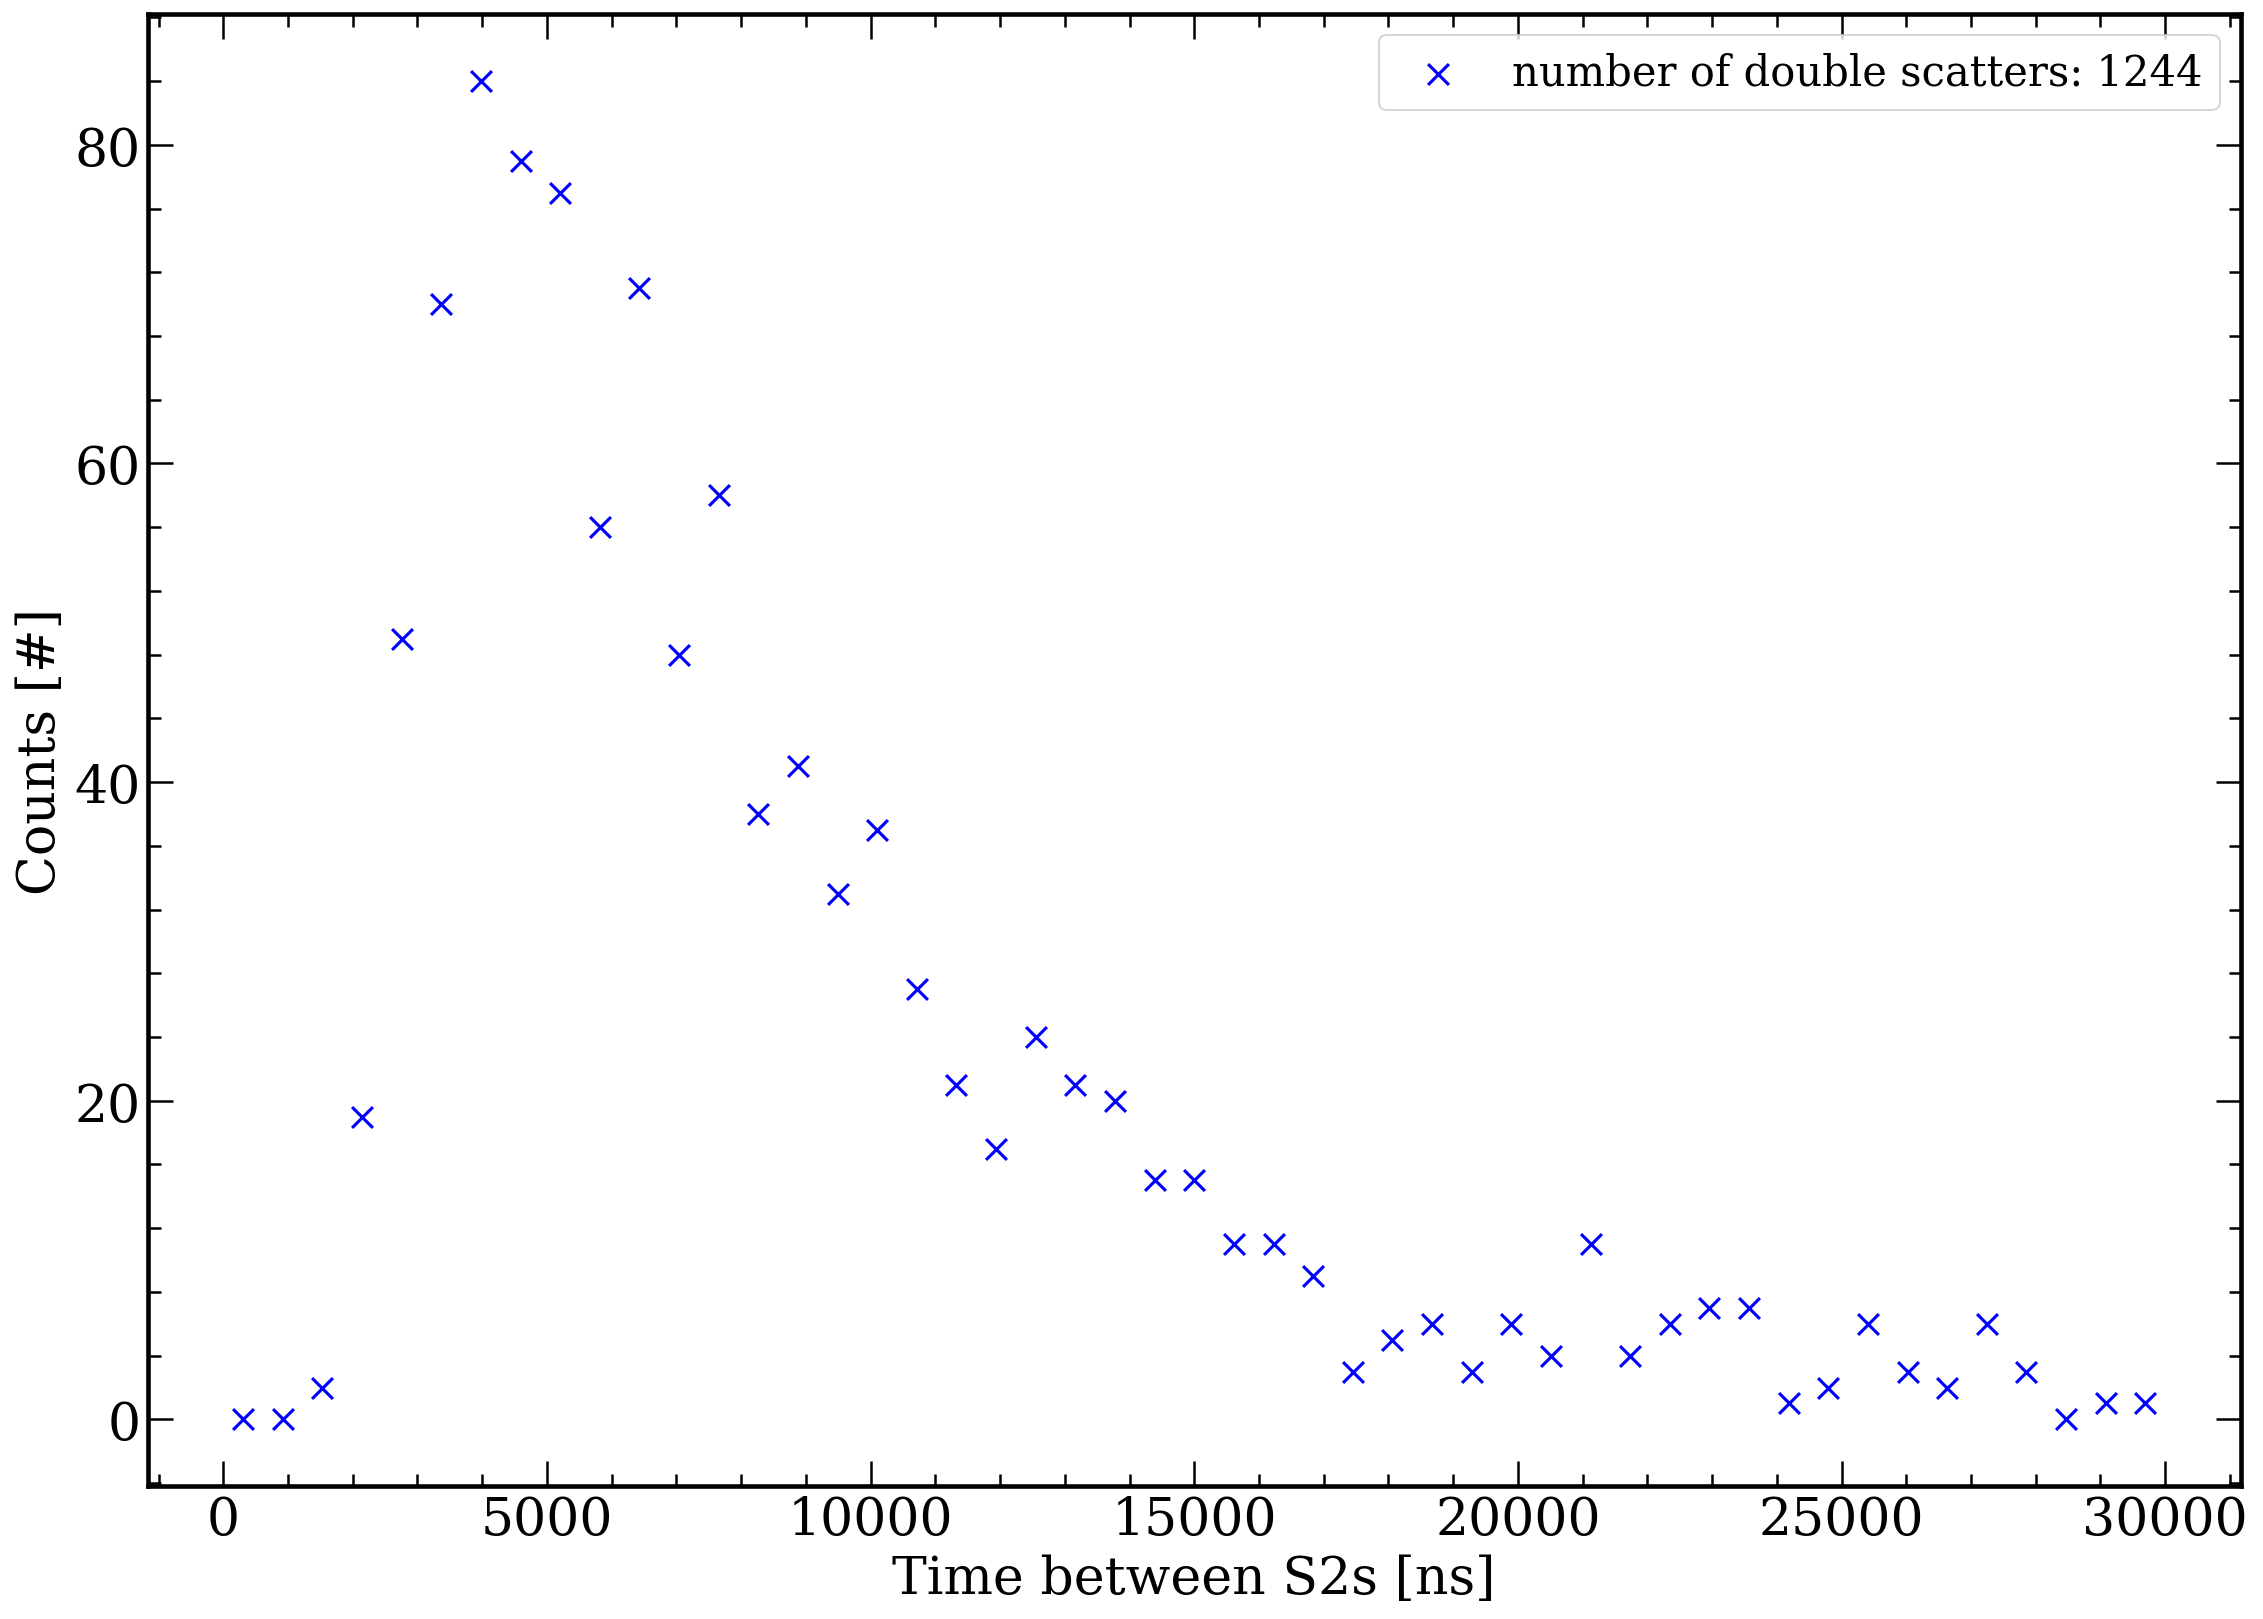

In [11]:
fig=plt.figure(figsize=(18, 13), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

n, binEdges = np.histogram(double_scatter_time, bins=np.linspace(0,30000,50))
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
axes.scatter(bincenters, n, s=100, c ='b', marker = 'x', label = 'number of double scatters: '+str(len(double_scatter_time)))
axes.set_xlabel('Time between S2s [ns]')
axes.set_ylabel('Counts [#]')
plt.legend(prop={'size': 20})
plt.show()

1244
1244
12439


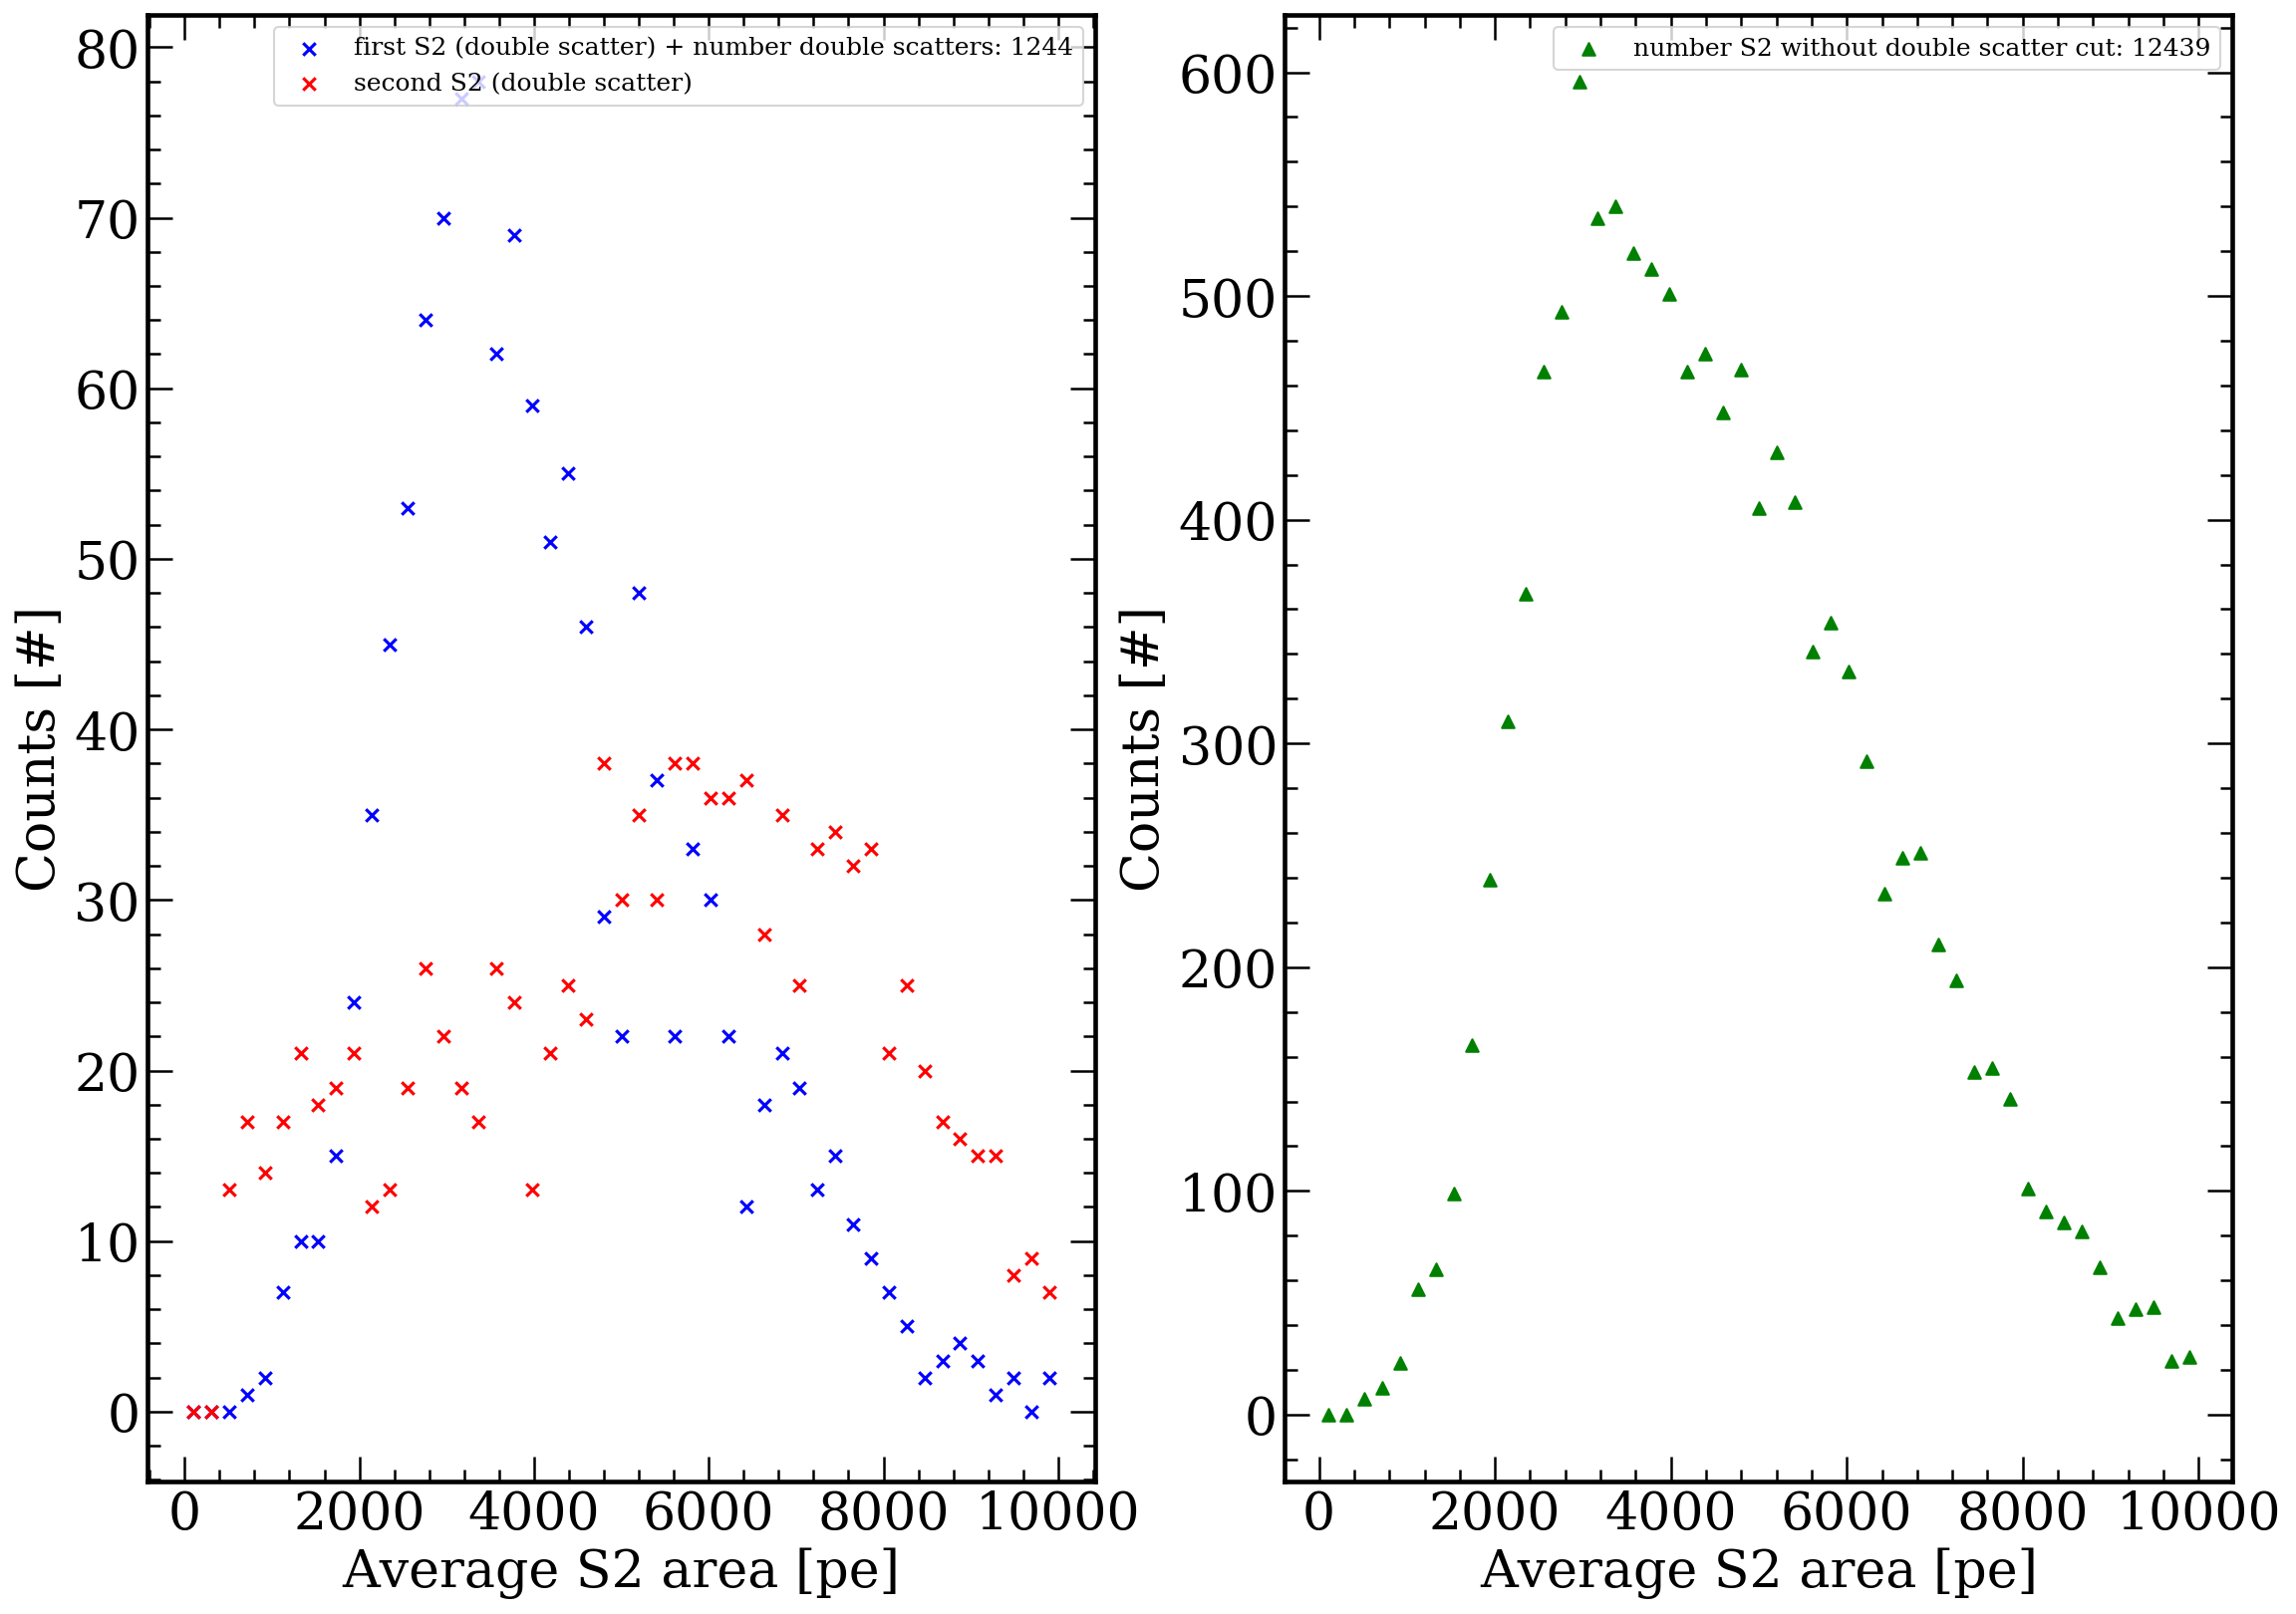

In [12]:
fig, (axes1, axes2)=plt.subplots(1,2,figsize=(18, 13), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters

axes1.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes1.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes1.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.yaxis.set_minor_locator(AutoMinorLocator(5))
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

axes2.tick_params(axis='both')

for axis in ['top','bottom','left','right']:
    axes2.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes2.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

first_s2_double_scatter, binEdges1 = np.histogram(first_s2_area, bins=np.linspace(0,10000,50))
bincenters_first_double_scatter = 0.5 * (binEdges1[1:] + binEdges1[:-1])

second_s2_double_scatter, binEdges2 = np.histogram(second_s2_area, bins=np.linspace(0,10000,50))
bincenters_second_double_scatter = 0.5 * (binEdges2[1:] + binEdges2[:-1])

kr_s2_no_scatter_cut, binEdges3 = np.histogram(kr_s2_area, bins=np.linspace(0,10000,50))
bincenters_no_scatter_cut = 0.5 * (binEdges3[1:] + binEdges3[:-1])

print(len(first_s2_area))
print(len(second_s2_area))
print(len(kr_s2_area))
axes1.scatter(bincenters_first_double_scatter, first_s2_double_scatter, c ='b', marker = 'x', label = 'first S2 (double scatter) + number double scatters: '+str(len(first_s2_area)))
axes1.scatter(bincenters_second_double_scatter, second_s2_double_scatter, c ='r', marker = 'x', label = 'second S2 (double scatter)')
axes2.scatter(bincenters_no_scatter_cut, kr_s2_no_scatter_cut, c ='g', marker = '^', label = 'number S2 without double scatter cut: '+str(len(kr_s2_area)))
axes1.legend(loc = 1, prop={'size': 12})
axes2.legend(loc = 1,prop={'size': 12})
axes1.set_xlabel('Average S2 area [pe]')
axes1.set_ylabel('Counts [#]')
axes2.set_xlabel('Average S2 area [pe]')
axes2.set_ylabel('Counts [#]')
plt.show()

[5478.046, 8820.815, 3394.9421, 6986.1753, 5078.7812, 3997.2322, 4618.435, 5939.619, 3010.563, 5764.9688]
[1073.2987, 2230.7598, 1476.4553, 5648.704, 4238.783, 8044.3843, 5377.3594, 36546.16, 2303.9985, 6507.365]
[6551.3447, 11051.575, 4871.3975, 12634.879, 9317.564, 12041.616, 9995.795, 42485.78, 5314.5615, 12272.334]


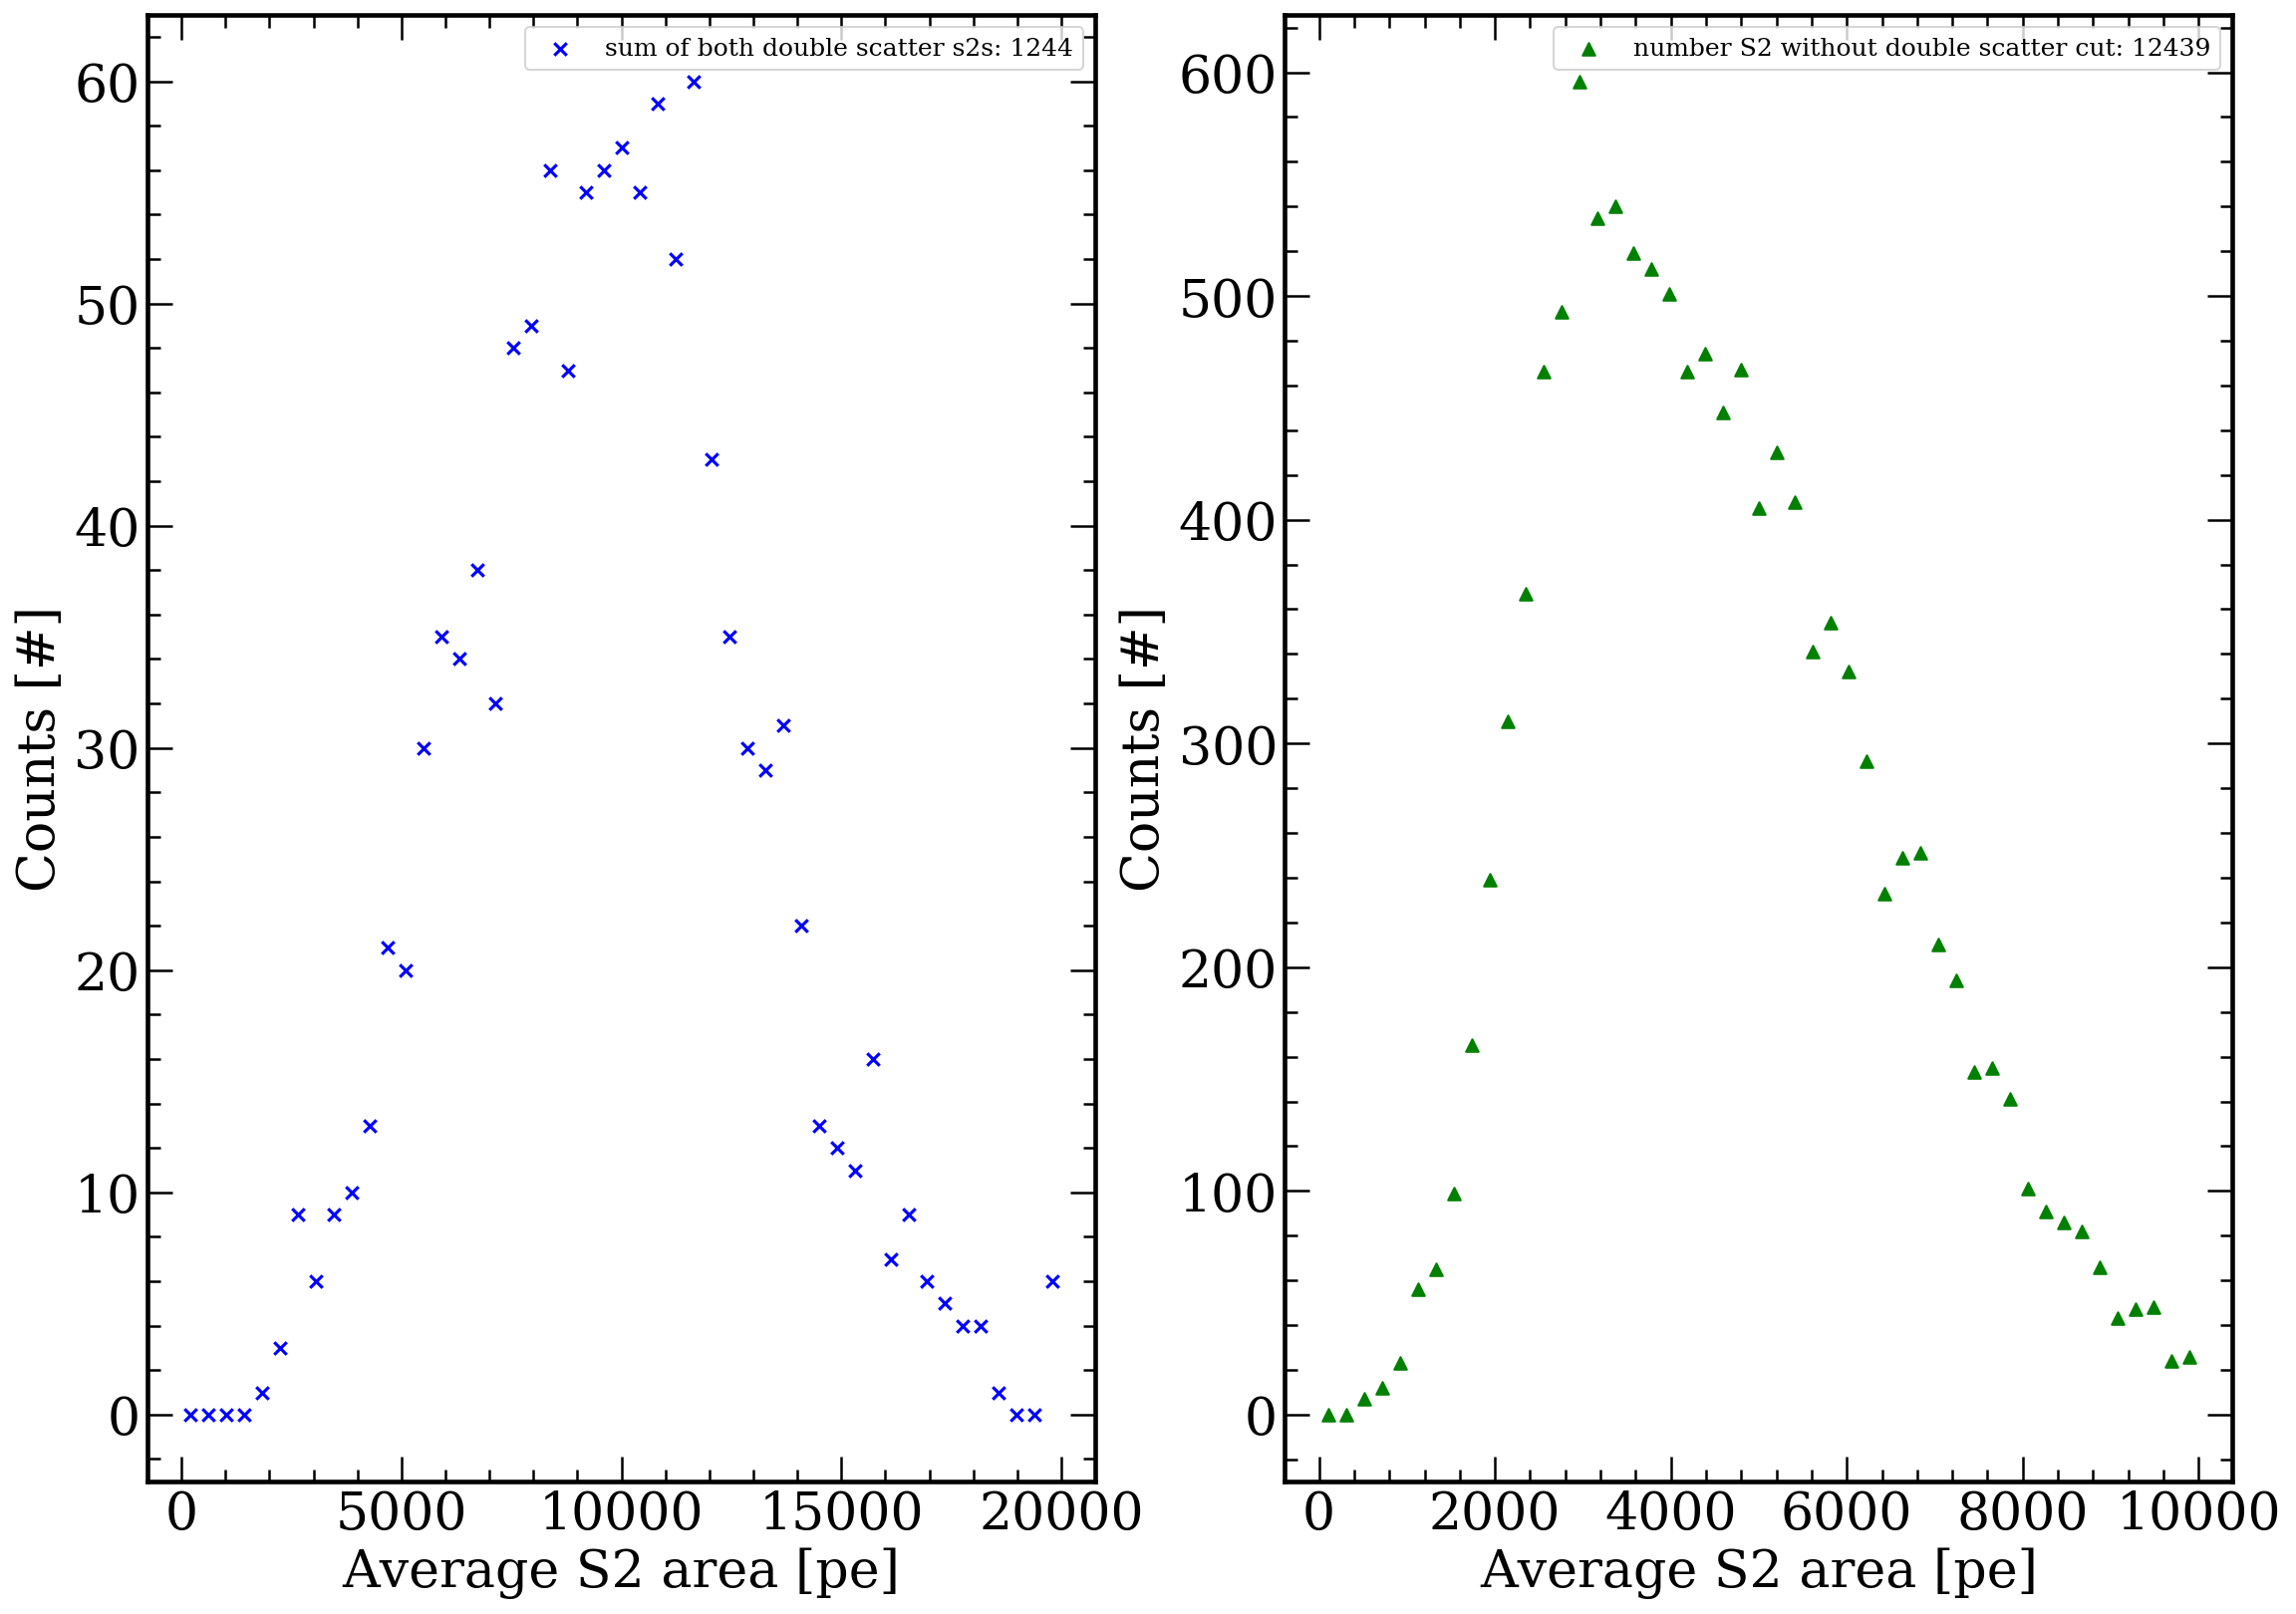

In [13]:
sum_s2_area = [x + y for x, y in zip(first_s2_area, second_s2_area)]
print(first_s2_area[:10])
print(second_s2_area[:10])
print(sum_s2_area[:10])
fig, (axes1, axes2)=plt.subplots(1,2,figsize=(18, 13), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters

axes1.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes1.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes1.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.yaxis.set_minor_locator(AutoMinorLocator(5))
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

axes2.tick_params(axis='both')

for axis in ['top','bottom','left','right']:
    axes2.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes2.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

sum_double_scatter, binEdges1 = np.histogram(sum_s2_area, bins=np.linspace(0,20000,50))
bincenters_double_scatter = 0.5 * (binEdges1[1:] + binEdges1[:-1])

kr_s2_no_scatter_cut, binEdges3 = np.histogram(kr_s2_area, bins=np.linspace(0,10000,50))
bincenters_no_scatter_cut = 0.5 * (binEdges3[1:] + binEdges3[:-1])

axes1.scatter(bincenters_double_scatter, sum_double_scatter, c ='b', marker = 'x', label = 'sum of both double scatter s2s: '+str(len(first_s2_area)))
axes2.scatter(bincenters_no_scatter_cut, kr_s2_no_scatter_cut, c ='g', marker = '^', label = 'number S2 without double scatter cut: '+str(len(kr_s2_area)))
axes1.legend(loc = 1, prop={'size': 12})
axes2.legend(loc = 1,prop={'size': 12})
axes1.set_xlabel('Average S2 area [pe]')
axes1.set_ylabel('Counts [#]')
axes2.set_xlabel('Average S2 area [pe]')
axes2.set_ylabel('Counts [#]')
plt.show()

In [14]:
sample_list = [1,2,3,4,5,6]
teststring = "is = {}".format(sample_list[2])
teststring2 = "is ="+str(sample_list[2])
# print(teststring)
# print(teststring2)
#print(kr_s2_index)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[9329 2776  306   24    4    0    0    0    0    0]


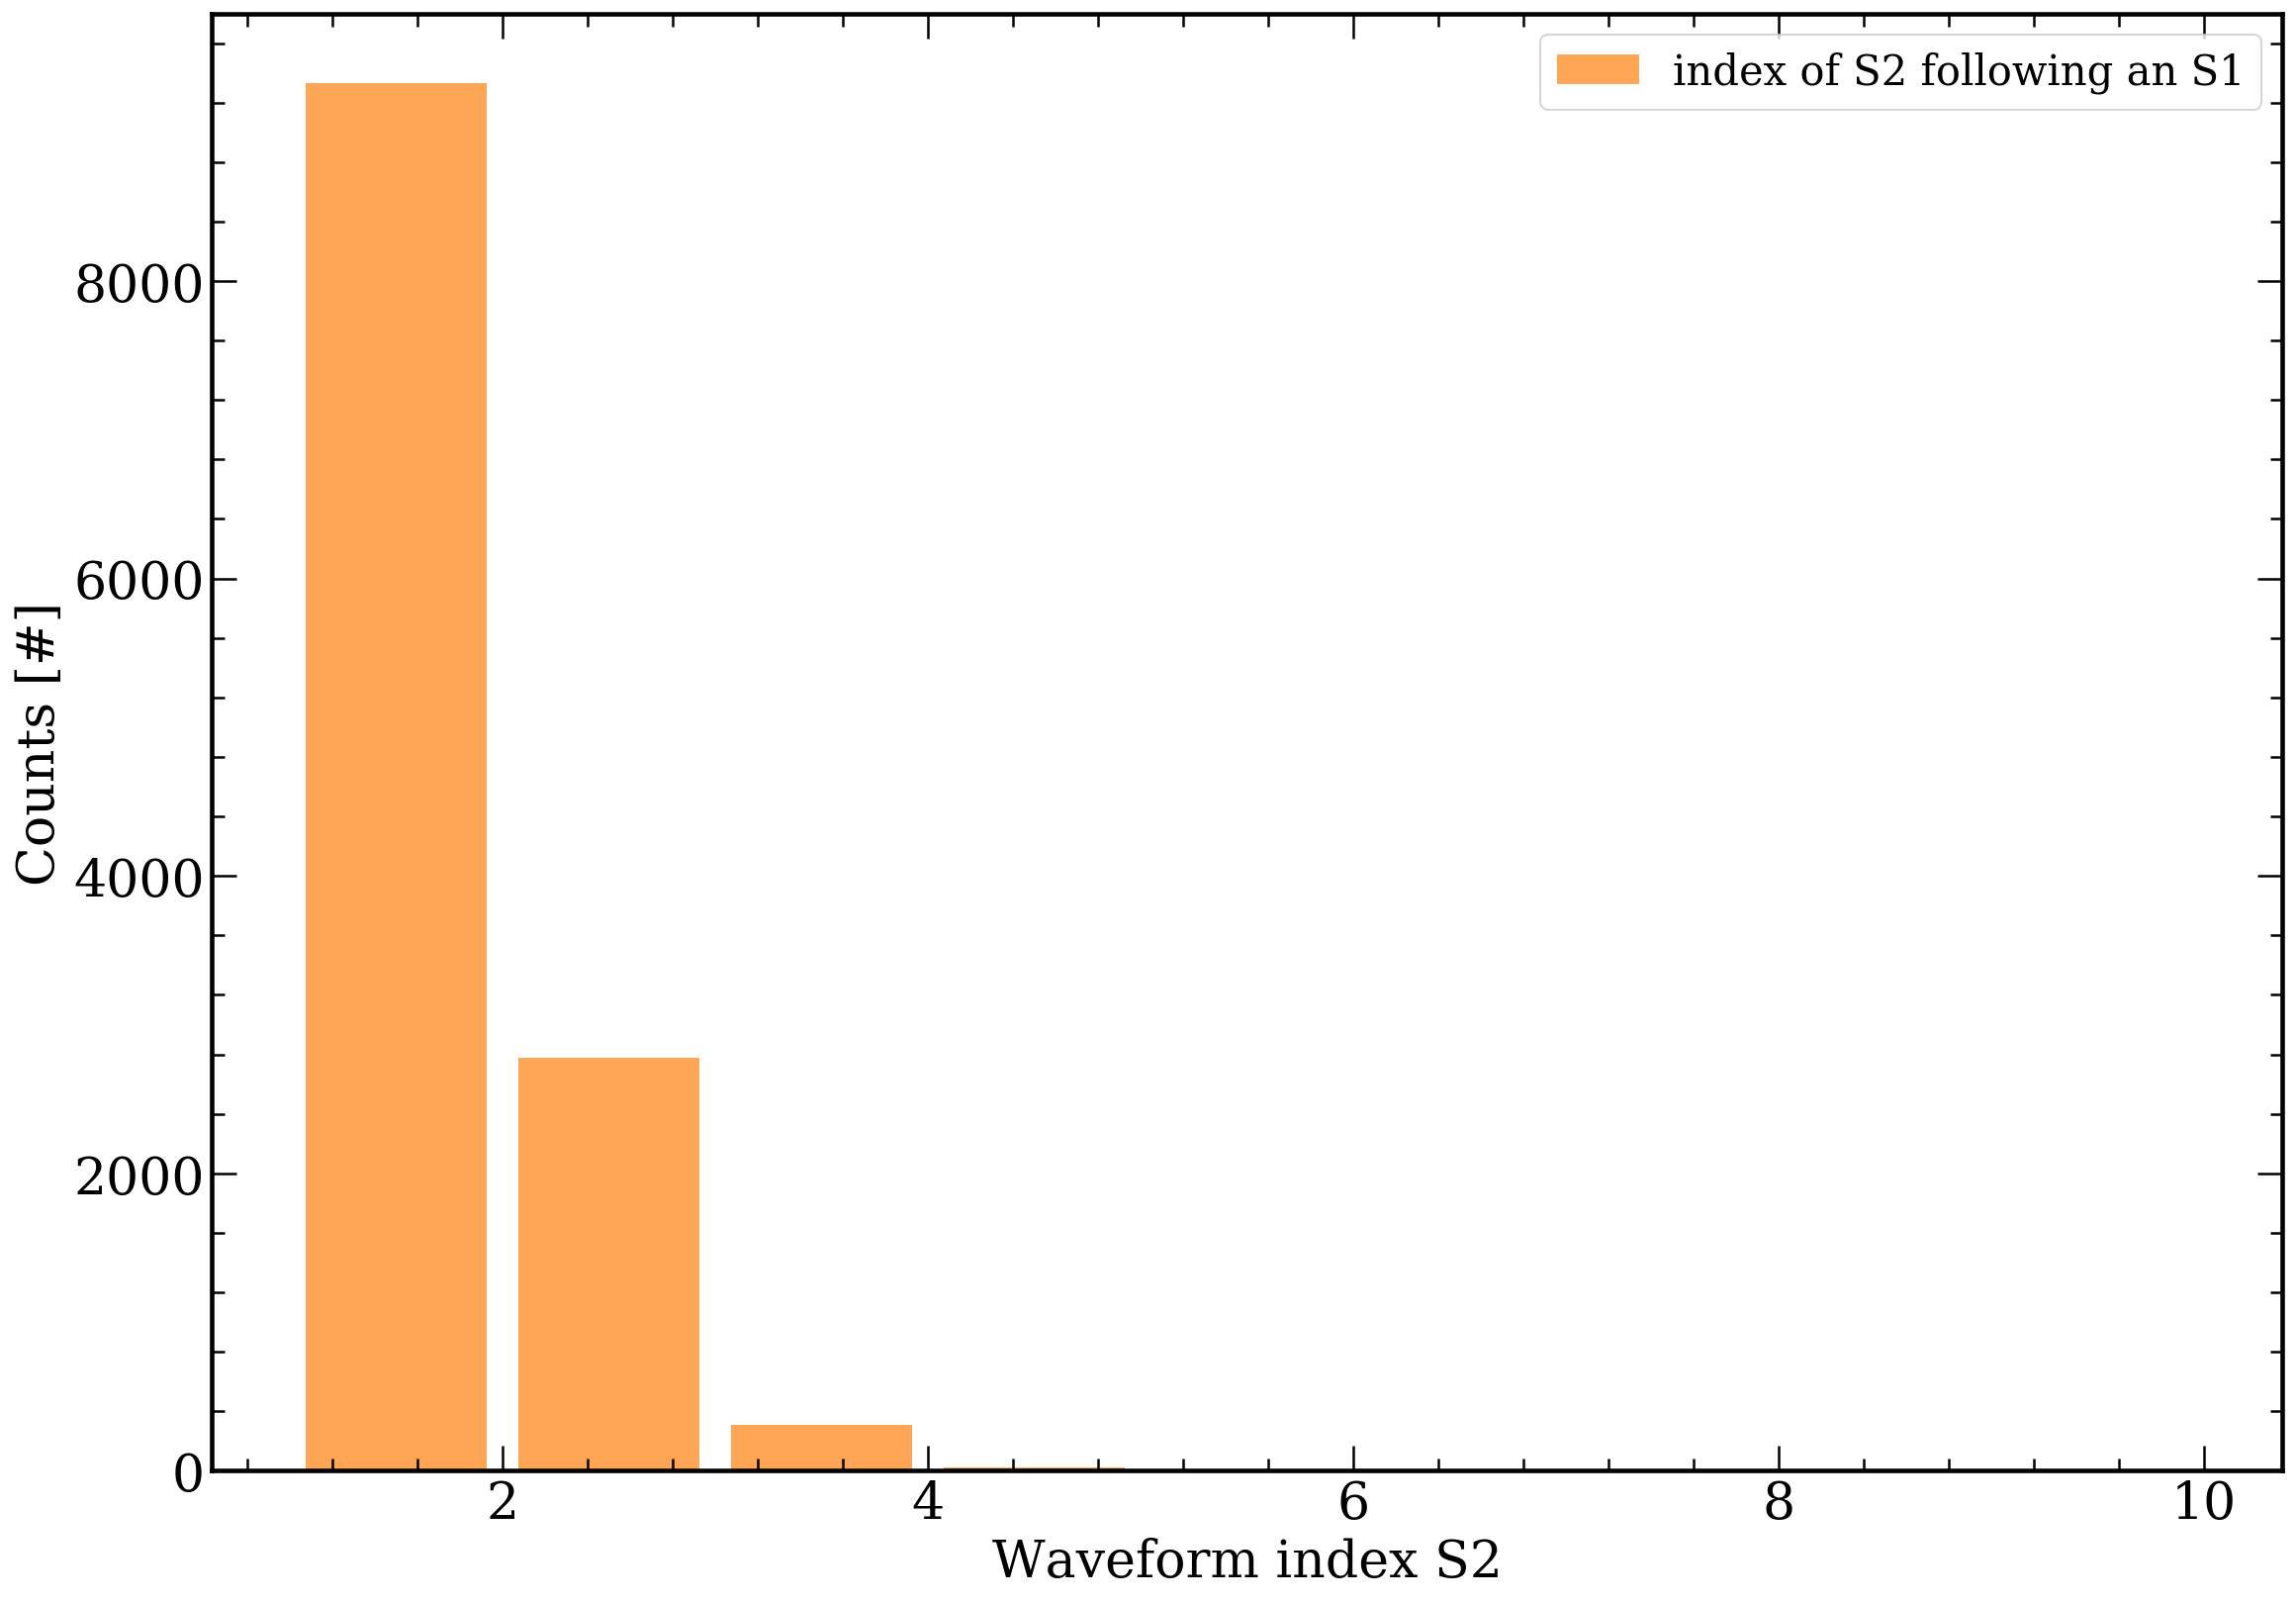

In [15]:
fig=plt.figure(figsize=(18, 13), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)




n, binEdges = np.histogram(kr_s2_index, bins=np.linspace(1,10,11))
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])

#print(bincenters)
x_bins = np.linspace(1,10,10)
print(x_bins)
print(n)
#axes.scatter(x_bins, n, c ='b', s=100, marker = 'x', label = 'waveform index after kr s1')
axes.hist(kr_s2_index, x_bins,rwidth=0.85, color='C1', alpha = 0.7, label= 'index of S2 following an S1')
axes.set_xlabel('Waveform index S2')
axes.set_ylabel('Counts [#]')
plt.legend(prop={'size': 20})
plt.show()